# Actividad - Regresión Lineal

* **Nombre:** Ramona Nájera Fuentes
* **Matrícula:** A01423596

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving presion.csv to presion.csv
User uploaded file "presion.csv" with length 801 bytes


In [3]:
# Muestra los primeros 6 renglones
df = pd.read_csv('presion.csv')
df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

Text(0, 0.5, 'Presión')

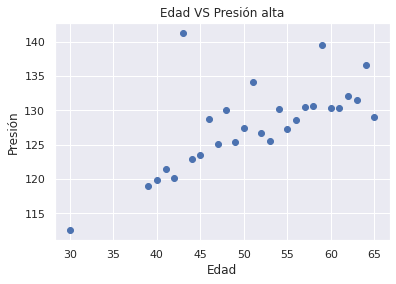

In [115]:
# Grafica la información de la edad y presión alta
plt.scatter(df['Age'], df['Average of ap_hi'])

plt.title('Edad VS Presión alta')
plt.xlabel('Edad')
plt.ylabel('Presión')

Text(0, 0.5, 'Presión')

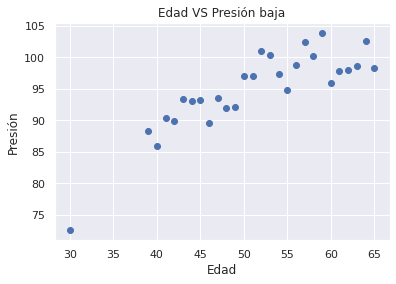

In [114]:
# Grafica la información de la edad y presión baja
plt.scatter(df['Age'], df['Average of ap_lo'])

plt.title('Edad VS Presión baja')
plt.xlabel('Edad')
plt.ylabel('Presión')

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [19]:
from sklearn.linear_model import LinearRegression

In [119]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
xHAM = df['Age']
yHAM = df['Average of ap_hi']

highAvgModel = LinearRegression(fit_intercept=True)

highAvgModel.fit(xHAM[:, np.newaxis], yHAM)

print("Edad - Presión alta")
print("    Slope: a = ", highAvgModel.coef_[0])
print("Intercept: b = ", highAvgModel.intercept_)

Edad - Presión alta
    Slope: a =  0.47769702977669154
Intercept: b =  103.3969740964366


<ipython-input-119-5f45bd64bd9d>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  highAvgModel.fit(xHAM[:, np.newaxis], yHAM)


In [121]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
xLAM = df['Age']
yLAM = df['Average of ap_lo']

lowAvgModel = LinearRegression(fit_intercept=True)

lowAvgModel.fit(xLAM[:, np.newaxis], yLAM)

print("Edad - Presión baja")
print("    Slope: a = ", lowAvgModel.coef_[0])
print("Intercept: b = ", lowAvgModel.intercept_)

Edad - Presión baja
    Slope: a =  0.6089810580238237
Intercept: b =  63.726200409422745


<ipython-input-121-98158a9fdce1>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lowAvgModel.fit(xLAM[:, np.newaxis], yLAM)


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

In [127]:
xfit = np.linspace(20, 70, 10)

<ipython-input-128-689877c17e60>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([xHAM,xHAM]), np.vstack([yHAM, highAvgModel.predict(xHAM[:, np.newaxis])]), color="green");


Text(0, 0.5, 'Presión')

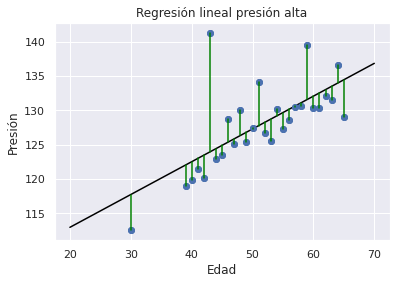

In [128]:
# Presión alta
yfitHAM = highAvgModel.predict(xfit[:, np.newaxis])

plt.scatter(xHAM, yHAM)

plt.plot(xfit, yfitHAM, color="black");
plt.plot(xHAM, yHAM, 'o')

plt.plot(np.vstack([xHAM,xHAM]), np.vstack([yHAM, highAvgModel.predict(xHAM[:, np.newaxis])]), color="green");

plt.title('Regresión lineal presión alta')
plt.xlabel('Edad')
plt.ylabel('Presión')

<ipython-input-129-e787d7b66821>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([xLAM,xLAM]), np.vstack([yLAM, lowAvgModel.predict(xLAM[:, np.newaxis])]), color="green");


Text(0, 0.5, 'Presión')

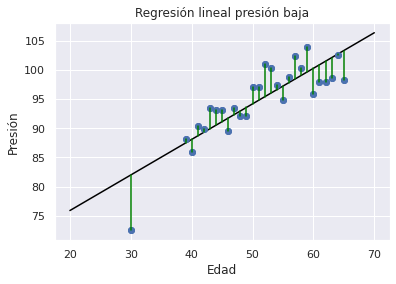

In [129]:
# Presión baja
yfitLAM = lowAvgModel.predict(xfit[:, np.newaxis])

plt.scatter(xLAM, yLAM)

plt.plot(xfit, yfitLAM, color="black");
plt.plot(xLAM, yLAM, 'o')

plt.plot(np.vstack([xLAM,xLAM]), np.vstack([yLAM, lowAvgModel.predict(xLAM[:, np.newaxis])]), color="green");

plt.title('Regresión lineal presión baja')
plt.xlabel('Edad')
plt.ylabel('Presión')

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [132]:
def pressure_low(age, dfAux):
  aux = dfAux[dfAux.Age == age][['Average of ap_lo']]
  return 'No hay información disponible' if aux.empty else aux

query_age= 76
print('Presión atal baja para una persona de', query_age, 'años')
print(pressure_low(query_age, df))

Presión atal baja para una persona de 76 años
No hay información disponible


In [133]:
def pressure_high(age, dfAux):
  aux = dfAux[dfAux.Age == age][['Average of ap_hi']]
  return 'No hay información disponible' if aux.empty else aux

query_age= 76
print('Presión atal alta para una persona de', query_age, 'años')
print(pressure_high(query_age, df))

Presión atal alta para una persona de 76 años
No hay información disponible
